In [1]:
# Modulos y datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
df_weight = pd.read_csv("/kaggle/input/weight-height-dataset-ver-1/weight-height_Ver1.csv")

# Mostremos algo de informacion
print("Filas - Columnas" , df_weight.shape)
print("*"*100)
print(df_weight.dtypes)

Filas - Columnas (10000, 3)
****************************************************************************************************
Gender     object
Height    float64
Weight    float64
dtype: object


In [2]:
df_Male = df_weight[df_weight.Gender == "Male"]
df_Female = df_weight[df_weight.Gender == "Female"]

# Analisis de outliers : Histograma

/tmp/ipykernel_33/2429735852.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(df_weight.Height,
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


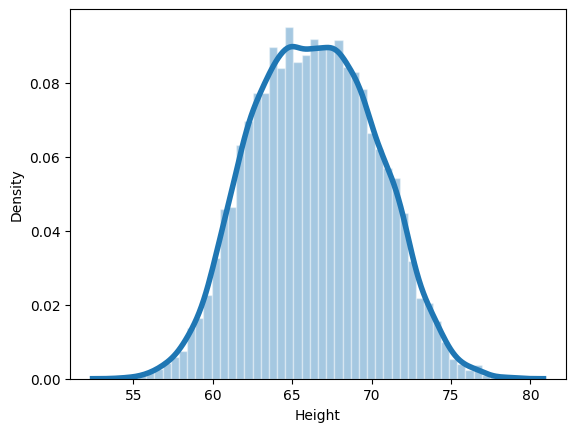

In [3]:
ax = sns.distplot(df_weight.Height,
                  hist = True,
                  hist_kws= {"edgecolor" : "white"},
                  kde_kws= {"linewidth" : 4}
                  )

# Analisis de Outliers : BoxPlot

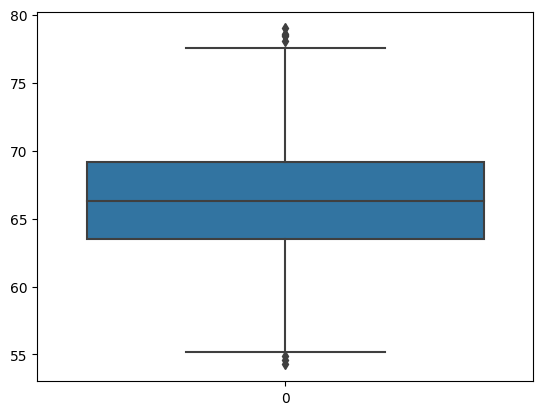

In [4]:
ax = sns.boxplot(df_weight.Height)

# Analisis de outliers : Scatter Plot

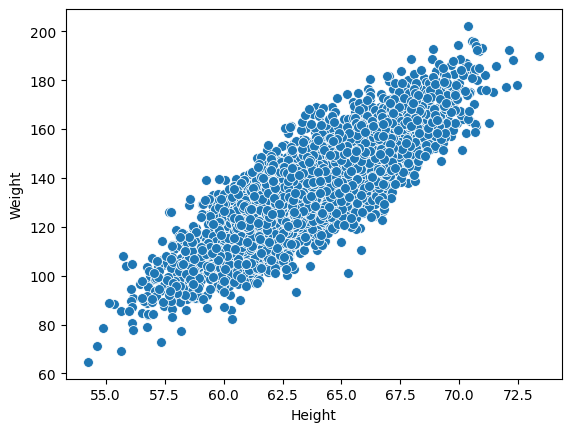

In [5]:
ax = sns.scatterplot(x = "Height", y = "Weight" , data = df_Female, s = 50)

# Analisis de Outlier : Regresion Lineal


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Height', ylabel='Weight'>

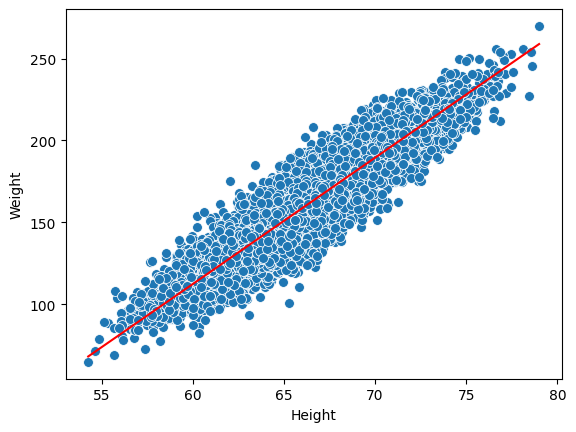

In [6]:
# Cargar la clase a ajustar (Modelo a crear)
from sklearn.linear_model import LinearRegression

# Instanciamos en un objeto la clase LinearRegression
linear_regression = LinearRegression()

# Ajustamos con los datos mi regresion lineal
linear_regression.fit(df_weight[["Height"]],df_weight[["Weight"]] )

# COnstruyamos predicciones para la variable dependiente (Weight)
# usando el modelo y la variable independiente (Height)
weight_predicted = linear_regression.predict(df_weight[["Height"]])
weight_predicted = weight_predicted.reshape(1,-1)[0]

# MOstremos nuestra nube de puntos
sns.scatterplot(x = "Height", y = "Weight" , data = df_weight, s = 50)
# Mostremos la linea de regresion
sns.lineplot(x = df_weight.Height,y = weight_predicted, color = "red" )

<Axes: xlabel='Height', ylabel='Weight'>

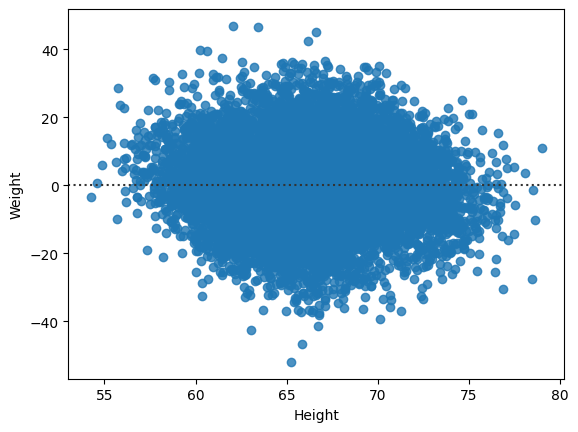

In [7]:
# Mostremos el diagrama de residuos
sns.residplot(x = "Height", y = "Weight", data = df_weight)

# Analisis de outliers : Dictancia de Cook's

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import OLSInfluence

# Ajustamos nuestro modelo de regresion usando statsmodels
f = "Weight ~ Height"
model = ols(formula = f, data = df_weight).fit()

# Calculamos la distancia de cook's
DistanciaCooks = OLSInfluence(model).cooks_distance
(distancias, p_value) = DistanciaCooks

In [9]:
distancias

0       0.000828
1       0.000147
2       0.000121
3       0.000292
4       0.000194
          ...   
9995    0.000180
9996    0.000006
9997    0.000089
9998    0.000164
9999    0.000145
Length: 10000, dtype: float64

In [10]:
p_value

array([0.99917258, 0.99985273, 0.99987912, ..., 0.99991093, 0.99983635,
       0.99985497])

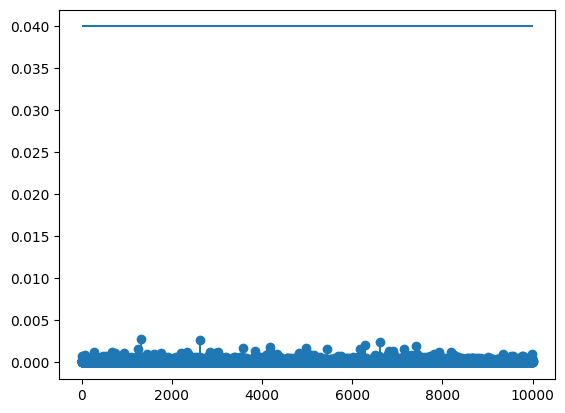

In [11]:
# MOstremos un grafico para la distancia de Cooks
threshold = 4/100

plt.stem(distancias, basefmt = " ")
plt.hlines(threshold, xmin = 0, xmax = 10000)
